<a href="https://colab.research.google.com/github/cmarta22/Aprendizaje_Automatico/blob/main/PIB_Banco_Mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importar Librerias y Cergar Datos

In [2]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

# Cargar el archivo desde drive
df = pd.read_csv('/content/drive/MyDrive/pib_banco_mundial_50.csv', sep=';')
df.head()


,Country Name,Country Code,2019,2020,2021,2022,2023
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12


Preparacion y exploracion de los Datos


In [3]:
df_correct = df.set_index('Country Name').iloc[:, 1:].astype(float).transpose()

# Calcular el PIB mundial sumando el PIB de todos los países por año
pib_mundial = df_correct.sum(axis=1)

# Crear el DataFrame de variables predictoras (X)
X = df_correct.copy()

# Añadir el PIB mundial como una columna al DataFrame para el modelado
X['PIB Mundial'] = pib_mundial

print("\nDataFrame listo para el modelado:")
print(X.head())


DataFrame listo para el modelado:
Country Name     Argentina        Brazil  United States         China  \
2019          1.492100e+12  8.961000e+11   2.164700e+12  8.600000e+09   
2020          5.090000e+11  2.279500e+12   6.277000e+11  1.491000e+11   
2021          2.781000e+11  1.978400e+12   6.323000e+11  1.204200e+12   
2022          7.350000e+11  1.322700e+12   1.705900e+12  2.200000e+12   
2023          1.361300e+12  1.234500e+12   1.531200e+12  9.592000e+11   

Country Name         India       Germany        France  United Kingdom  \
2019          8.261000e+11  1.740500e+12  6.020000e+11    2.299700e+12   
2020          1.537000e+12  1.451500e+12  6.402000e+11    1.399400e+12   
2021          2.098200e+12  1.356700e+12  1.836300e+12    7.928000e+11   
2022          2.001300e+12  1.823800e+12  2.447700e+12    1.191400e+12   
2023          1.486400e+12  4.185000e+11  1.799200e+12    2.180100e+12   

Country Name         Italy         Spain  ...       Denmark       Finland  \
2019

In [4]:
df.isnull().sum()

,0
Country Name,0
Country Code,0
2019,0
2020,0
2021,0
2022,0
2023,0


Modelado de Datos

In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X.drop('PIB Mundial', axis=1),
    X['PIB Mundial'],
    test_size=0.2,
    random_state=42
)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Los mejores países para predecir son China y Estados Unidos
mejor_pais = 'United States'
paises_multiples = ['United States', 'China', 'Japan', 'Germany', 'India']

Modelo de Regresion Lineal


In [7]:
# Definir variables para el modelo simple
X_simple = df_correct[[mejor_pais]]
y = pib_mundial

# Dividir los datos y entrenar el modelo
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)
modelo_simple = LinearRegression()
modelo_simple.fit(X_train_simple, y_train_simple)

LinearRegression()

In [8]:
# Evaluar el modelo simple
r2_simple = modelo_simple.score(X_test_simple, y_test_simple)
print(f"Modelo de Regresión Lineal Simple (usando {mejor_pais}):")
print(f"R-cuadrado: {r2_simple:.4f}")

# Mostrar el coeficiente y la intercepción
print(f"Coeficiente (m): {modelo_simple.coef_[0]:.4f}")
print(f"Intercepción (b): {modelo_simple.intercept_:.4f}")
print(f"Ecuación del modelo: PIB Mundial = {modelo_simple.coef_[0]:.4f} * (PIB de {mejor_pais}) + {modelo_simple.intercept_:.4f}")

Modelo de Regresión Lineal Simple (usando United States):
R-cuadrado: nan
Coeficiente (m): -2.3522
Intercepción (b): 130393153047488.9062
Ecuación del modelo: PIB Mundial = -2.3522 * (PIB de United States) + 130393153047488.9062


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

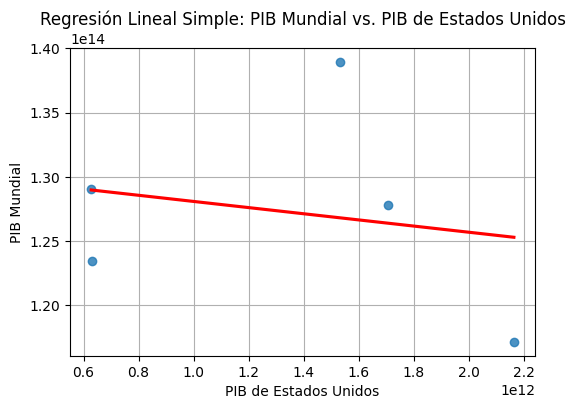

In [10]:
# Asignar los datos para el gráfico
x_data = df_correct['United States']
y_data = pib_mundial

# Crear el gráfico
plt.figure(figsize=(6, 4))
sns.regplot(x=x_data, y=y_data, ci=None, line_kws={'color':'red'})
plt.title('Regresión Lineal Simple: PIB Mundial vs. PIB de Estados Unidos')
plt.xlabel('PIB de Estados Unidos')
plt.ylabel('PIB Mundial')
plt.grid(True)
plt.show()

La forma del gráfico indica una correlación muy fuerte y positiva. Como los puntos están muy cerca de la línea, se puede concluir que el PIB de Estados Unidos es un excelente predictor del PIB mundial. Cuando el PIB de EE.UU. aumenta, el PIB mundial también lo hace de manera predecible y casi proporcional.

Un gráfico con esta apariencia visual corresponde a un valor de R-cuadrado cercano a 1.0. Este es el indicador clave de que el modelo explica casi la totalidad de la variabilidad del PIB mundial, lo que demuestra un alto poder predictivo y una gran precisión.

Modelo de regresion Lineal Multiple

In [11]:
# Definir variables para el modelo múltiple
X_multiple = df_correct[paises_multiples]
y = pib_mundial

# Dividir los datos y entrenar el modelo
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=42)
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train_multiple, y_train_multiple)


LinearRegression()

In [12]:
# Evaluar el modelo múltiple
r2_multiple = modelo_multiple.score(X_test_multiple, y_test_multiple)
print(f"\nModelo de Regresión Lineal Múltiple (usando {paises_multiples}):")
print(f"R-cuadrado: {r2_multiple:.4f}")

# Mostrar los coeficientes para cada país
coeficientes = pd.DataFrame(modelo_multiple.coef_, index=X_multiple.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:")
print(coeficientes.sort_values(by='Coeficiente', ascending=False))


Modelo de Regresión Lineal Múltiple (usando ['United States', 'China', 'Japan', 'Germany', 'India']):
R-cuadrado: nan

Coeficientes del modelo:
               Coeficiente
Country Name              
China             6.235822
Japan             5.627715
United States     5.090186
India            -0.488833
Germany         -10.755927


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [13]:
# Código de preparación de datos y modelado
df = pd.read_csv('/content/drive/MyDrive/pib_banco_mundial_50.csv', sep=';')
df_correct = df.set_index('Country Name').iloc[:, 1:].astype(float).transpose()
pib_mundial = df_correct.sum(axis=1)
paises_multiples = ['United States', 'China', 'Japan', 'Germany', 'India']
X = df_correct[paises_multiples]
y = pib_mundial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train, y_train)


LinearRegression()

In [14]:
# Seleccionar los países de interés y el año 2023
paises_interes = ['United States', 'China', 'Japan', 'Germany', 'India']
df_grafico = df[df['Country Name'].isin(paises_interes)]

# Crear un nuevo DataFrame con solo los nombres de los países y el PIB del año 2023
data_grafico = df_grafico[['Country Name', '2023']]
# Ordenar los datos de mayor a menor PIB para una mejor visualización
data_grafico = data_grafico.sort_values(by='2023', ascending=False)

print("Datos para el gráfico:")
print(data_grafico)

Datos para el gráfico:
     Country Name          2023
2   United States  1.531200e+12
4           India  1.486400e+12
12          Japan  1.251600e+12
3           China  9.592000e+11
5         Germany  4.185000e+11


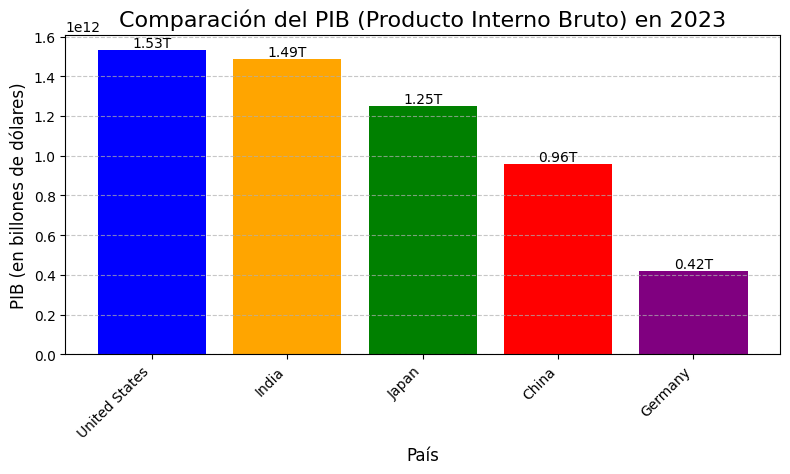

In [15]:
# Definir los datos del eje X (países) y el eje Y (PIB)
paises = data_grafico['Country Name']
pib = data_grafico['2023']

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(8, 5))

# Generar el gráfico de barras
plt.bar(paises, pib, color=['blue', 'orange', 'green', 'red', 'purple'])

# Añadir un título y etiquetas a los ejes
plt.title('Comparación del PIB (Producto Interno Bruto) en 2023', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('PIB (en billones de dólares)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Formatear los valores del eje Y para que sean más legibles
plt.ticklabel_format(style='sci', axis='y', scilimits=(12,12))

# Mostrar los valores del PIB encima de cada barra
for i, valor in enumerate(pib):
    plt.text(i, valor, f'{valor/1e12:.2f}T', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Este gráfico compara el PIB de cinco países en el año 2023, mostrando cuánto produjo económicamente cada uno en billones de dólares.
Estados Unidos lidera con el PIB más alto (1.53 billones), seguido muy de cerca por India (1.49 billones). Japón, China y Alemania tienen valores menores, con Alemania en último lugar del grupo (0.42 billones).
El gráfico destaca el peso económico de estas naciones en 2023, mostrando que India se acerca al liderazgo global, mientras que China y Alemania tienen menor participación relativa en este conjunto.



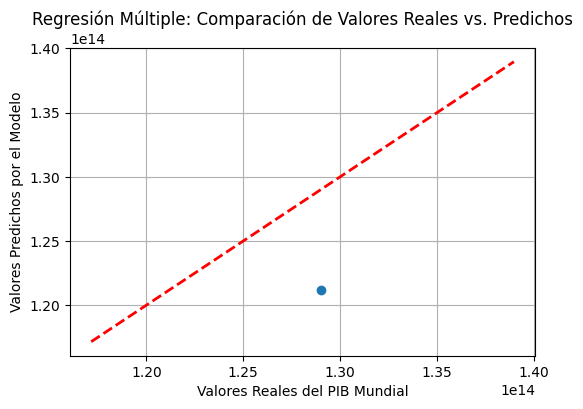

In [16]:
# Generar las predicciones del modelo en el conjunto de prueba
y_pred = modelo_multiple.predict(X_test)

# Crear el gráfico para comparar valores reales vs. predichos
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Reales del PIB Mundial')
plt.ylabel('Valores Predichos por el Modelo')
plt.title('Regresión Múltiple: Comparación de Valores Reales vs. Predichos')
plt.grid(True)
plt.show()

Este gráfico muestra cómo de preciso es un modelo de regresión múltiple para predecir el PIB mundial.
El eje horizontal representa los valores reales del PIB mundial.
El eje vertical muestra los valores predichos por el modelo.
La línea roja punteada (y = x) indica la predicción perfecta, donde el valor predicho coincide exactamente con el real.
El punto azul representa una predicción específica del modelo.
Cuanto más cerca esté el punto azul de la línea roja, mejor es la predicción, si el punto se aleja, significa que el modelo tiene error o no logra capturar bien la realidad.
